In [1]:
%pylab inline

%load_ext autoreload
%autoreload 2
from pyotf.microscope import WidefieldMicroscope, ConfocalMicroscope
from easy_plot import easy_plot

Populating the interactive namespace from numpy and matplotlib


In [2]:
plt.set_cmap("inferno");

<Figure size 432x288 with 0 Axes>

In [3]:
# We'll use a 1.27 NA water dipping objective imaging in water
psf_params = dict(
    na=1.27,
    ni=1.33,
    wl=0.561,
    size=64,
    vec_corr="none",
#     zrange=[0]
)

# Set the Nyquist sampling rate
nyquist_sampling = psf_params["wl"] / psf_params["na"] / 4



In [4]:
# calculate infocus part only
psfs = [WidefieldMicroscope(**psf_params, model='sheppard', pixel_size=0.99 * nyquist_sampling, oversample_factor=oversample_factor)
       for oversample_factor in (1, 3, 5, 7, 9)]

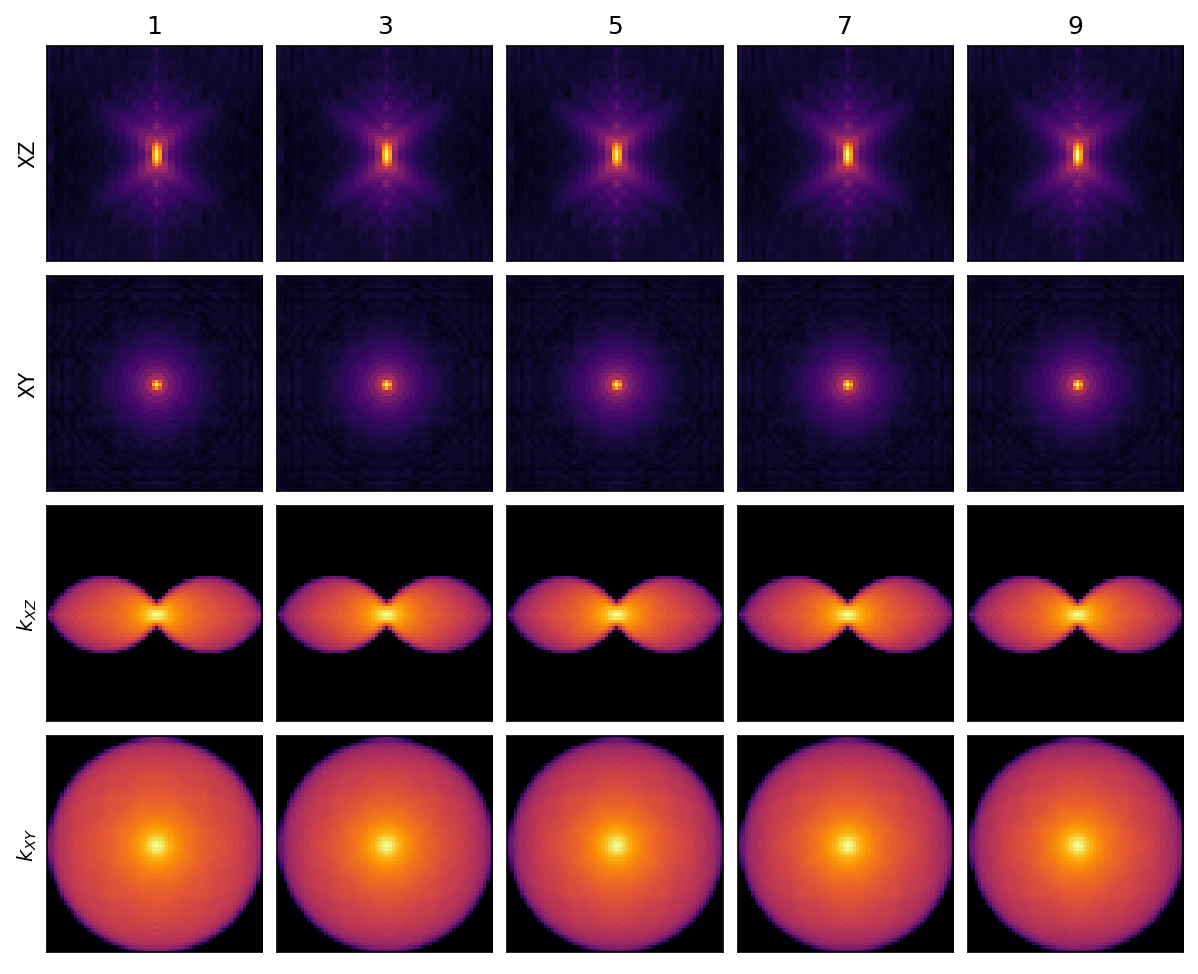

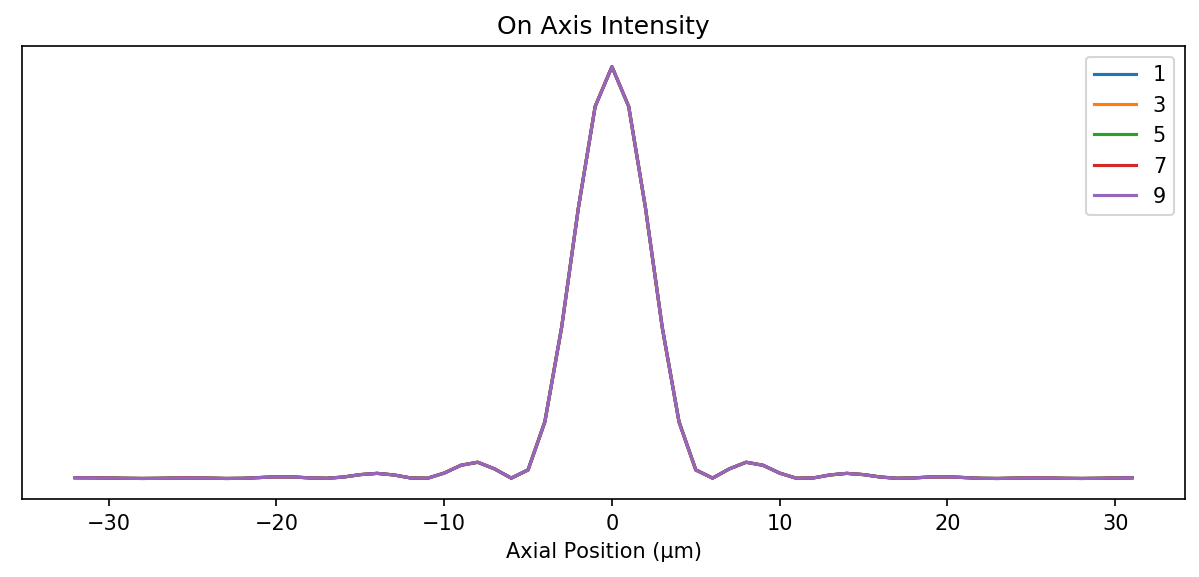

In [5]:
easy_plot([p.PSF for p in psfs], (1, 3, 5, 7, 9), interpolation=None)

In [6]:
p = psfs[-1].PSF / psfs[-1].PSF.max() - psfs[0].PSF / psfs[0].PSF.max()

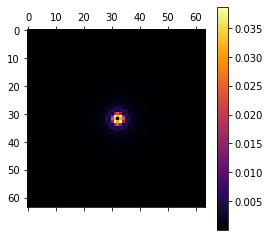

In [7]:
matshow(p.max(0))
colorbar()

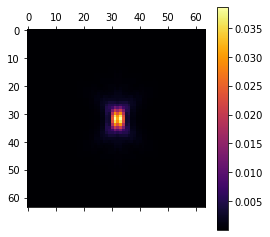

In [8]:
matshow(p.max(1))
colorbar()

In [12]:
# calculate infocus part only
con_psfs = [ConfocalMicroscope(**psf_params, oversample_factor=1,
                               model='sheppard', pixel_size=0.45 * nyquist_sampling,
                               wl_em=0.585, pinhole_size=pinhole_size)
       for pinhole_size in (0, 0.1, 1, 10)]

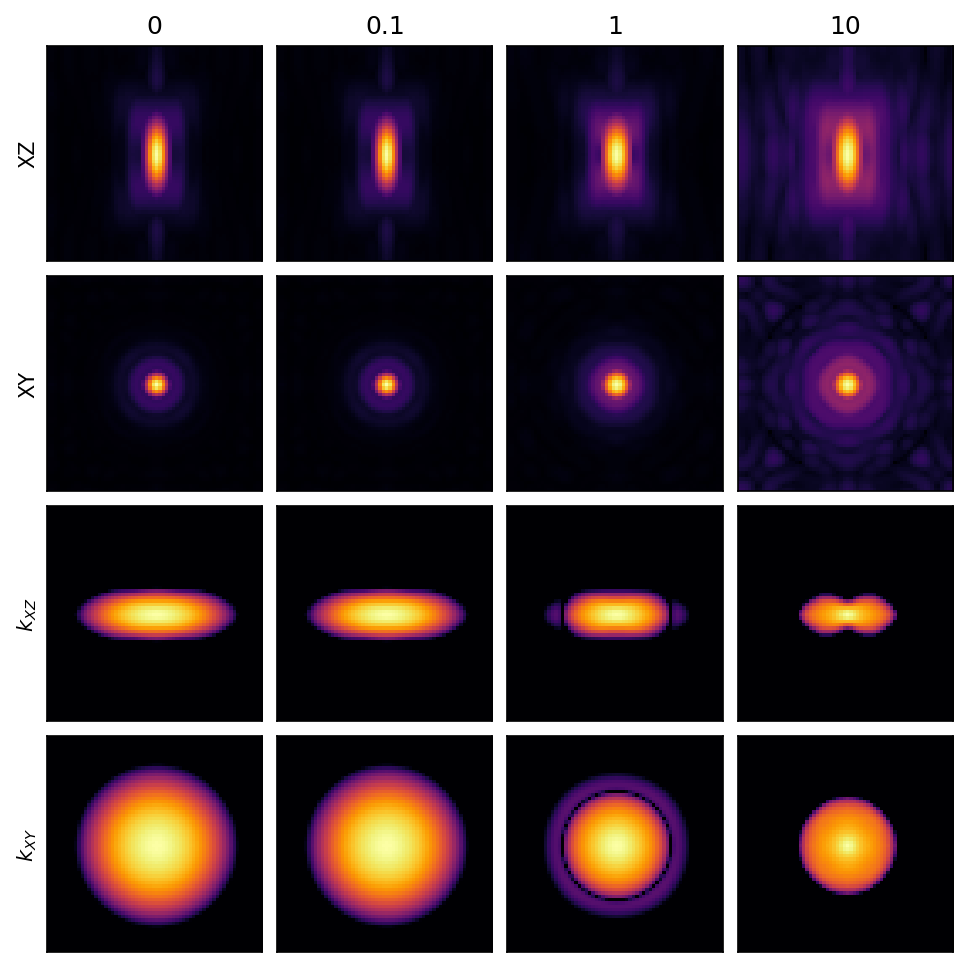

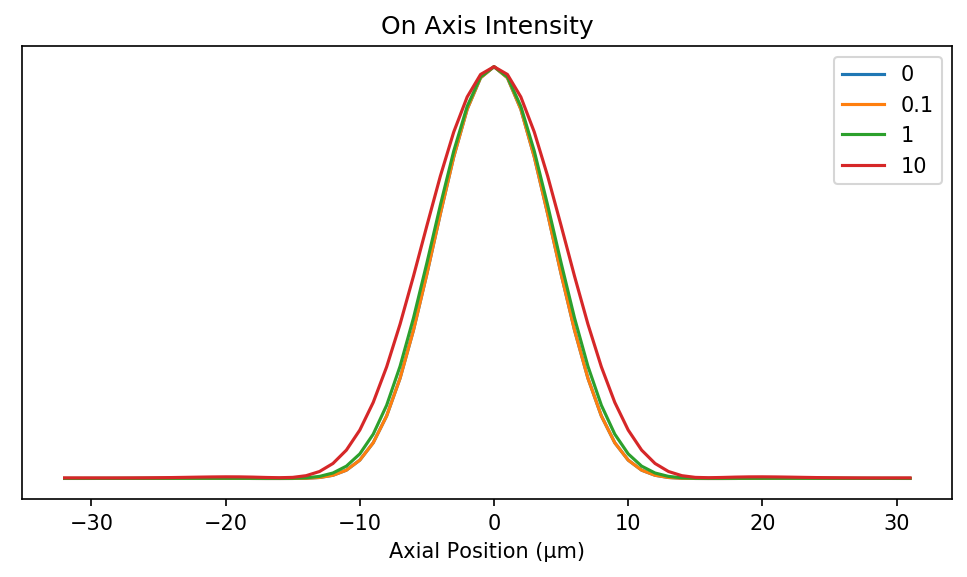

In [13]:
easy_plot([p.PSF for p in con_psfs], (0, 0.1, 1, 10), interpolation=None)